# FIFA Wage Prediction Analysis

In [729]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

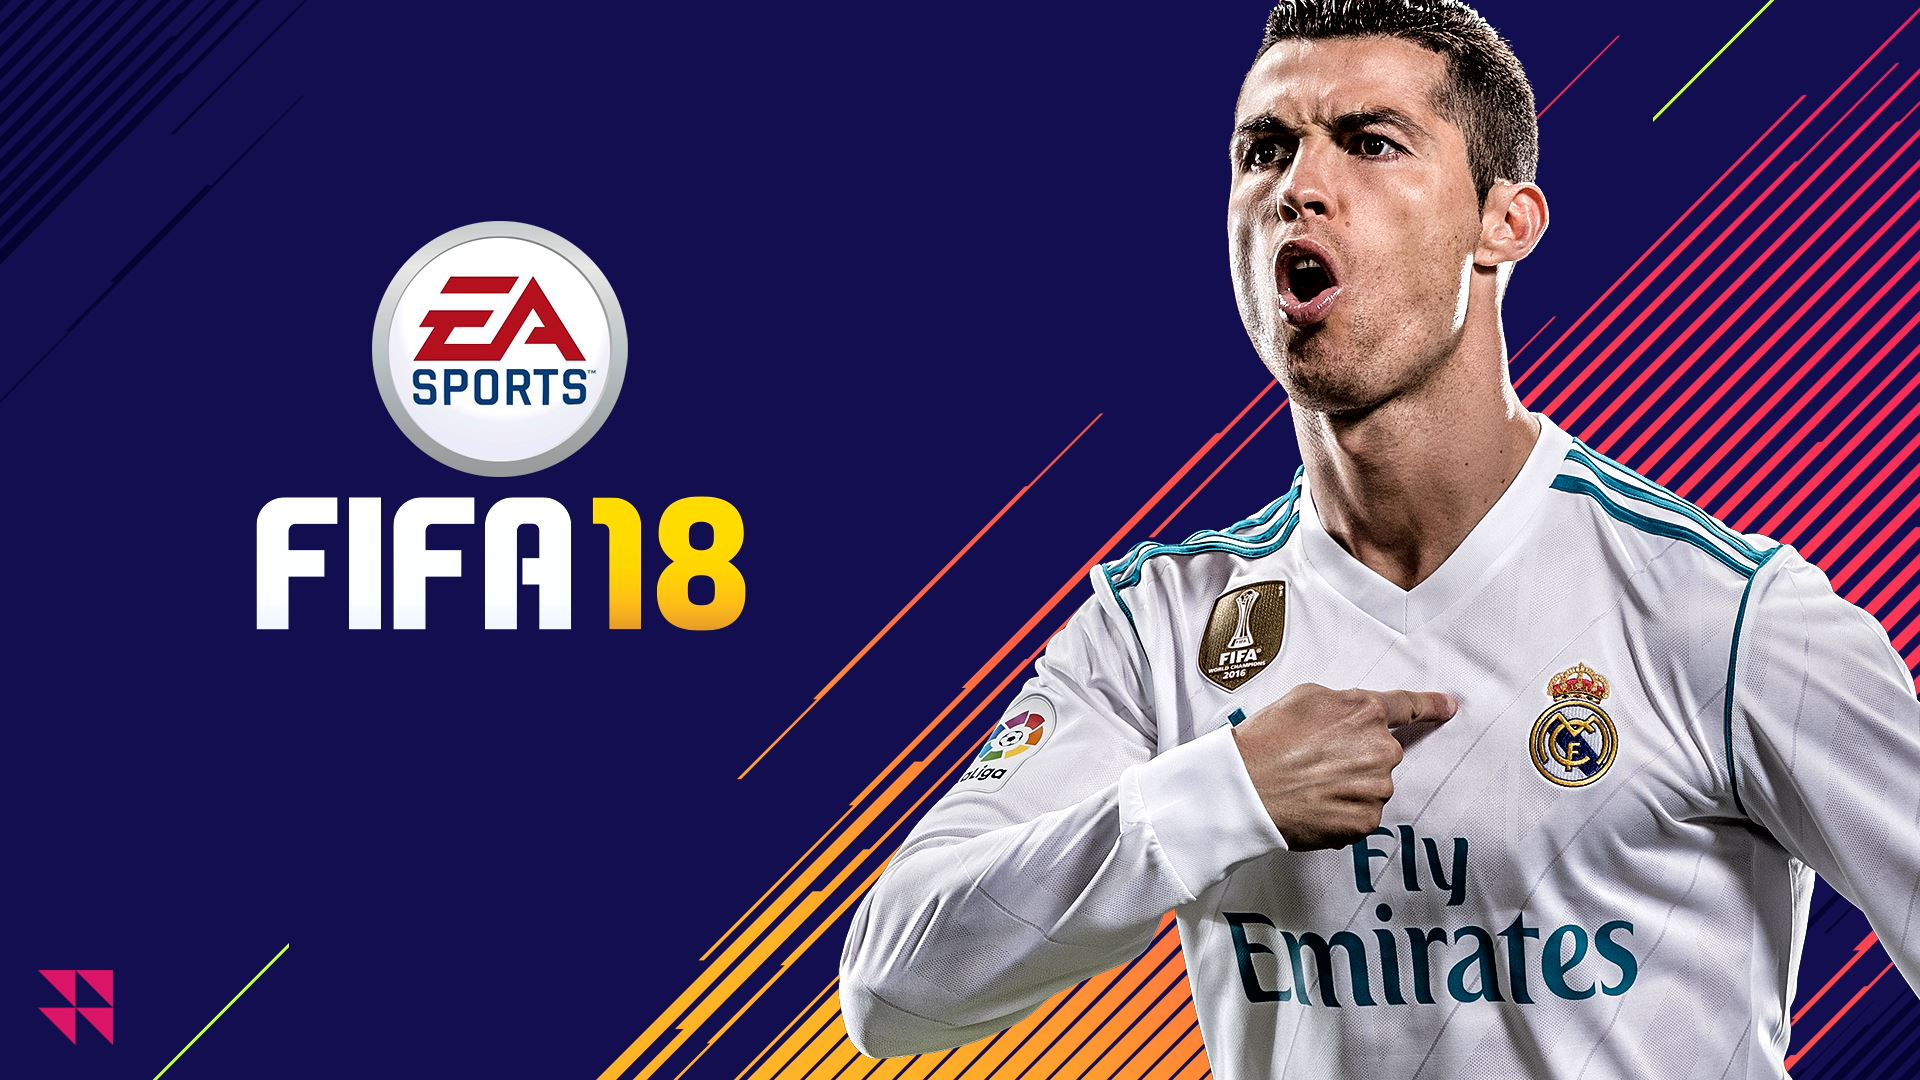

In [728]:
Image(filename = 'C:/Users/sthal/FIFA images/image_cover.jpg', width=1000, height=1000)

Sports have become much more than just the game itself. It has widened its scope to brand building, entertainment, widening followers as well as developing players at grass-root level. Association football player wages and their release clause values have skyrocketed in the last decade. Teams all over the world and especially in Europe are willing to over lucrative deals for global star athletes. At the same time, they scout for potential superstars worldwide and try to lure them join the club at an early age. Therefore, it is extremely important for management to optimize their resources without compromising quality. 

One of the key factors is deciding player wages. If there is a Ronaldo or Messi in your team and you fail to meet their expectations, there are at least 10 other clubs who are well equipped and prepared to take them away. On the other hand, if they are provided a much higher number, you might end up upsetting some other players and they could end up leaving the club. Also, the players will also understand the important factors that they need to improve to reach the top level. In this notebook, I will analyze the FIFA 18 dataset available at [kaggle](https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset). The analysis will contain following factors:
- Data cleaning 
- Data preparation
- Exploratory data analysis
- Predictive modeling
- Conclusion

The dataset will be divided into 4 sections based on the playing positions. They will be goalkeepers, defenders, midfielders and attackers. For each of these positions, the most important feature in deciding player wages will be determined. 

**Note:** The wages mentioned and predicted are all on a weekly level.

In [586]:
## Code Header
## Notebook Name: FIFA Wage Prediction Analysis
## Objective: To understand how player attributes in association football lead to their weekly wages.
## Start Date: 8th April, 2020
## Data Sources
    # Source: FIFA 18 Complete Player Dataset - https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset
## Author(s): Soumya Halder
## Edits to be made
## Structure of the analysis
    # Data Input: Read all the columns in the right format
    # Data cleaning and preparation for the analysis
    # EDA - Glean insights which might help design decisions
    # SciKit Learn
        # Linear Regression
        # Trees
    
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import textstat
import math
import warnings
warnings.filterwarnings('ignore')

The data is available in 3 different tables:
- **Attribute:** Contains important football attributes for playing the sport
- **Personal:** Contains player's personal information along with their wages and values
- **Position:** Contains overall rating of different posiitons

All 3 tables are imported, column data types are checked and modified accordingly. 

# Importing Data

In [587]:
# Importing datasets which contains information about players attributes, personal data and position

attribute = pd.read_csv('Project Data/PlayerAttributeData.csv')
personal = pd.read_csv('Project Data/PlayerPersonalData.csv')
position = pd.read_csv('Project Data/PlayerPlayingPositionData.csv');

In [707]:
print('Dimension of attribute table is:', attribute.shape)
attribute.head()

Dimension of attribute table is: (17981, 36)


id_attribute  Acceleration  Aggression  Agility  Balance  Ball control  \
0             0          89.0        63.0     89.0     63.0          93.0   
1             1          92.0        48.0     90.0     95.0          95.0   
2             2          94.0        56.0     96.0     82.0          95.0   
3             3          88.0        78.0     86.0     60.0          91.0   
4             4          58.0        29.0     52.0     35.0          48.0   

   Composure  Crossing  Curve  Dribbling  ...  Reactions  Short passing  \
0       95.0      85.0   81.0       91.0  ...       96.0           83.0   
1       96.0      77.0   89.0       97.0  ...       95.0           88.0   
2       92.0      75.0   81.0       96.0  ...       88.0           81.0   
3       83.0      77.0   86.0       86.0  ...       93.0           83.0   
4       70.0      15.0   14.0       30.0  ...       85.0           55.0   

   Shot power  Sliding tackle  Sprint speed  Stamina  Standing tackle  \
0        94.0            23.0          91.0     92.0             31.0   
1        85.0            26.0          87.0     73.0             28.0   
2        80.0            33.0          90.0     78.0             24.0   
3        87.0            38.0          77.0     89.0             45.0   
4        25.0            11.0          61.0     44.0             10.0   

   Strength  Vision  Volleys  
0      80.0    85.0     88.0  
1      59.0    90.0     85.0  
2      53.0    80.0     83.0  
3      80.0    84.0     88.0  
4      83.0    70.0     11.0  

[5 rows x 36 columns]

In [589]:
# Correcting datatypes for attribute df
attribute.dtypes;
attribute = attribute.convert_objects(convert_numeric = True);

In [706]:
print('Dimension of personal table is:', personal.shape)
personal.head()

Dimension of personal table is: (17981, 14)


id_personal      ID               Name  Age  \
0            0   20801  Cristiano Ronaldo   32   
1            1  158023           L. Messi   30   
2            2  190871             Neymar   25   
3            3  176580          L. Suárez   30   
4            4  167495           M. Neuer   31   

                                             Photo Nationality  \
0   https://cdn.sofifa.org/48/18/players/20801.png    Portugal   
1  https://cdn.sofifa.org/48/18/players/158023.png   Argentina   
2  https://cdn.sofifa.org/48/18/players/190871.png      Brazil   
3  https://cdn.sofifa.org/48/18/players/176580.png     Uruguay   
4  https://cdn.sofifa.org/48/18/players/167495.png     Germany   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/38.png       94         94   
1  https://cdn.sofifa.org/flags/52.png       93         93   
2  https://cdn.sofifa.org/flags/54.png       92         94   
3  https://cdn.sofifa.org/flags/60.png       92         92   
4  https://cdn.sofifa.org/flags/21.png       92         92   

                  Club                                   Club Logo   Value  \
0       Real Madrid CF  https://cdn.sofifa.org/24/18/teams/243.png  €95.5M   
1         FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png   €105M   
2  Paris Saint-Germain   https://cdn.sofifa.org/24/18/teams/73.png   €123M   
3         FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png    €97M   
4     FC Bayern Munich   https://cdn.sofifa.org/24/18/teams/21.png    €61M   

    Wage  Special  
0  €565K     2228  
1  €565K     2154  
2  €280K     2100  
3  €510K     2291  
4  €230K     1493

In [591]:
personal.dtypes;

In [708]:
print('Dimension of position table is:', position.shape)
position.head()

Dimension of position table is: (17981, 29)


id_position   CAM    CB   CDM    CF    CM      ID   LAM    LB   LCB  ...  \
0            0  89.0  53.0  62.0  91.0  82.0   20801  89.0  61.0  53.0  ...   
1            1  92.0  45.0  59.0  92.0  84.0  158023  92.0  57.0  45.0  ...   
2            2  88.0  46.0  59.0  88.0  79.0  190871  88.0  59.0  46.0  ...   
3            3  87.0  58.0  65.0  88.0  80.0  176580  87.0  64.0  58.0  ...   
4            4   NaN   NaN   NaN   NaN   NaN  167495   NaN   NaN   NaN  ...   

     RB   RCB   RCM   RDM    RF    RM    RS    RW   RWB    ST  
0  61.0  53.0  82.0  62.0  91.0  89.0  92.0  91.0  66.0  92.0  
1  57.0  45.0  84.0  59.0  92.0  90.0  88.0  91.0  62.0  88.0  
2  59.0  46.0  79.0  59.0  88.0  87.0  84.0  89.0  64.0  84.0  
3  64.0  58.0  80.0  65.0  88.0  85.0  88.0  87.0  68.0  88.0  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 29 columns]

In [593]:
position.dtypes;

The 3 tables are joined in two steps - two tables at a time and the final table **fifa_ppa** is created.

In [594]:
# Joining 2 datasets at a time - personal & position
fifa_pp = pd.merge(personal, position, left_on = ['id_personal'], right_on = ['id_position'], how = 'inner')
fifa_pp.shape

(17981, 43)

In [595]:
# Joining the above result with the 3rd table attribute
fifa_ppa = pd.merge(fifa_pp, attribute, left_on = ['id_personal'], right_on = ['id_attribute'], how = 'inner')
fifa_ppa.shape

(17981, 79)

# Data Cleaning & Preparation

The **Preferred Positions** column has multiple positions separated by space. The first entry is separated from it to get the primary position a player is preferred for.

In [596]:
# Split preferred postion column to get the primary playing position for a player
fifa_splitcol = fifa_ppa['Preferred Positions'].str.split(' ', n = 2, expand=True)

# Adding the column to main dataset
fifa_ppa['Position'] = fifa_splitcol[0]

# Dropping original column from main dataset
fifa_ppa.drop(columns = ['Preferred Positions'], inplace = True) 

In [597]:
# Getting all unique values from the new column
fifa_ppa['Position'].unique()

array(['ST', 'RW', 'LW', 'GK', 'CDM', 'CB', 'RM', 'CM', 'LM', 'LB', 'CAM',
       'RB', 'CF', 'RWB', 'LWB'], dtype=object)

There are 15 specific positions (unique values) in the new column **Position**. Hence, they are grouped into 4 broader categories based on their primary role in the team - goalkeepers **(GK)**, defenders **(DF)**, midfielders **(MF)** and attackers **(AT)**.

In [598]:
# Combining all positions into 4 major categories - goalkeeper, defender, midfielder, attacker
def player_pos (row):
    if row['Position'] == 'GK':
        return 'GK'
    if row['Position'] == 'CB' or row['Position'] == 'LB' or row['Position'] == 'RB' or row['Position'] == 'RWB' or row['Position'] == 'LWB':
        return 'DF'
    if row['Position'] == 'CM' or row['Position'] == 'RM' or row['Position'] == 'LM' or row['Position'] == 'CAM' or row['Position'] == 'CDM':
        return 'MF'
    return 'AT'

fifa_ppa['Playing Position'] = fifa_ppa.apply(lambda row: player_pos(row), axis=1)

The currency columns **Value** and **Wage** are modified into a proper format. The entries in Value is in millions while the wage column is in thousands, hence they were multiplied with the required factor in below conversions.

In [599]:
# Converting the Wage & Value column into numeric data type
def convert_into_currency (value):
    out = value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in value:
        out = float(out.replace('K', ''))*1000
    return float(out)

fifa_ppa['Value'] = fifa_ppa['Value'].apply(lambda x: convert_into_currency(x))
fifa_ppa['Wage'] = fifa_ppa['Wage'].apply(lambda x: convert_into_currency(x))

In [600]:
# Length of the dataset
print('Length of DF dataset with NaN:', len(fifa_ppa))

Length of DF dataset with NaN: 17981


The below output shows the number of players available in each category.

In [710]:
fifa_ppa.groupby('Playing Position').agg({'id_personal' : ['count']})

id_personal
                       count
Playing Position            
AT                      3338
DF                      5440
GK                      2029
MF                      7174

Now, 4 datasets are created to check amount of missing values. It is observed that the attribute values for *GK* players are missing altogether. Therefore, those indexes are dropped and we are left with 15,148 observations.

In [602]:
# Creating subsets of the data by playing positions
fifa_gk = fifa_ppa.loc[fifa_ppa['Playing Position'] == 'GK']
fifa_df = fifa_ppa.loc[fifa_ppa['Playing Position'] == 'DF']
fifa_mf = fifa_ppa.loc[fifa_ppa['Playing Position'] == 'MF']
fifa_at = fifa_ppa.loc[fifa_ppa['Playing Position'] == 'AT']

In [603]:
fifa_gk.isna().sum();
fifa_df.isna().sum();
fifa_mf.isna().sum();
fifa_at.isna().sum();

In [604]:
# Removing addtional columns and drop rows with NaN values
fifa18 = fifa_ppa.drop(['ID_x', 'Photo', 'Flag', 'Club Logo', 'Special', 'id_position', 'ID_y', 'id_attribute', 'GK diving', 'GK handling', 'GK kicking',
                        'GK positioning', 'GK reflexes', 'ID'], axis = 1)

fifa18.dropna(inplace = True)
fifa18.reset_index()
print('Length of DF dataset after removing NaN:', len(fifa18))

Length of DF dataset after removing NaN: 15148


# Exploratory Data Analysis

## Variable distributions

For further analysis, we'll check the distribution of some variables and try to infer some findings.

The below distribution of age by number of players show that most players in the data are in the age range of 20-30. These are the peak years of any player in the sport and hence was an expected result.

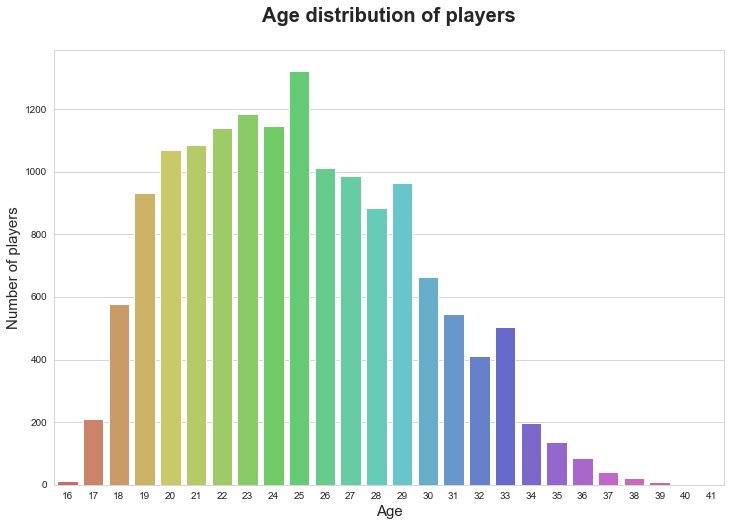

In [605]:
# Distribution of age
plt.figure(figsize = (12,8))
sns.set_style('whitegrid')
plt.title('Age distribution of players', fontsize = 20, fontweight = 'bold', y = 1.05,)
sns.countplot(x = 'Age', data = fifa18, palette = 'hls');
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Number of players', fontsize = 15)
plt.show();

The overall rating follows a normal distribution with a mean value of 66. As only less than 25% of the players have a high rating i.e. more than 71, it can be understood why there are less teams who have an overall strong squad.

Note: It is possible that even 71 is not a high rating, which further says that the best players count is way lesser than 25%.

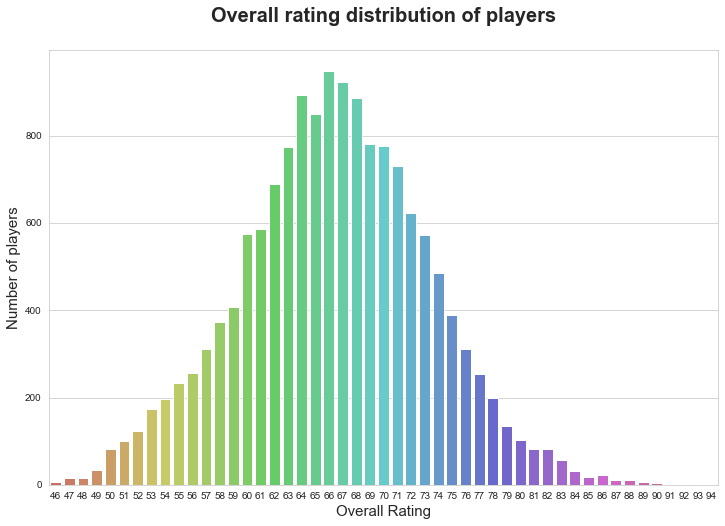

count    15148.000000
mean        66.378862
std          6.882890
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64


In [711]:
# Distribution of Overall Rating
plt.figure(figsize = (12,8))
sns.set_style('whitegrid')
plt.title('Overall rating distribution of players', fontsize = 20, fontweight = 'bold', y = 1.05,)
sns.countplot(x = 'Overall', data = fifa18, palette = 'hls');
plt.xlabel('Overall Rating', fontsize = 15)
plt.ylabel('Number of players', fontsize = 15)
plt.show();
print(fifa18['Overall'].describe())

The wage distribution is checked using a boxplot and since we observed in the above plot that there are very few players with high ratings, it is clear that there wages will skew the below distribution.

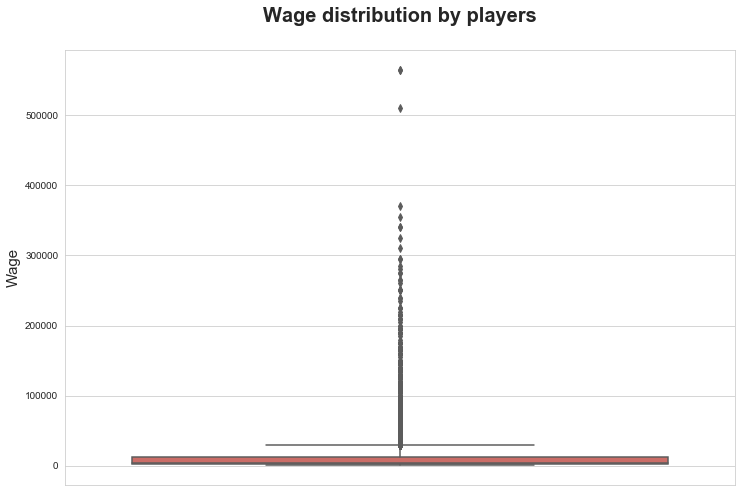

In [607]:
# Distribution of Overall Rating
plt.figure(figsize = (12,8))
sns.set_style('whitegrid')
plt.title('Wage distribution by players', fontsize = 20, fontweight = 'bold', y = 1.05,)
sns.boxplot(x = 'Wage', data = fifa18, palette = 'hls', orient = 'v');
plt.ylabel('Wage', fontsize = 15)
plt.show();

## Variable relationship

It seems that a player reaches peak around the age of 25 and maintains it till early 30s.

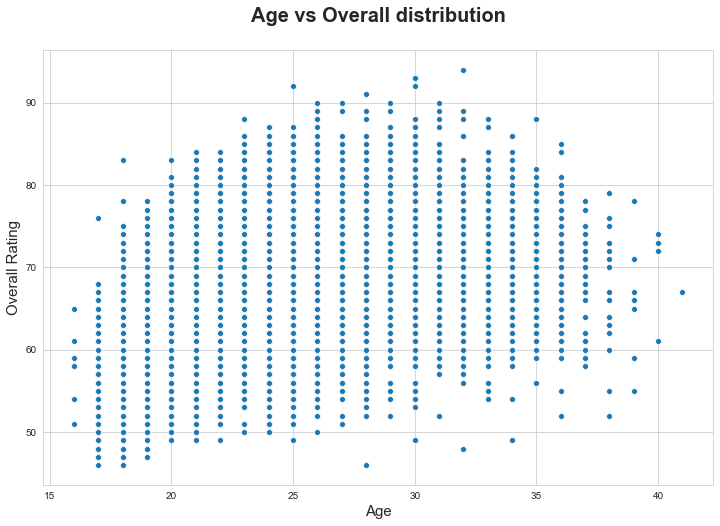

In [608]:
# Distribution of Wages
plt.figure(figsize = (12,8))
sns.set_style('whitegrid')
plt.title('Age vs Overall distribution', fontsize = 20, fontweight = 'bold', y = 1.05,)
sns.scatterplot(x = 'Age', y = 'Overall', data = fifa18, palette = 'hls');
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Overall Rating', fontsize = 15)
plt.show();

The age vs wage relation is also inline with the above finding, the most wages are collected by players around the age of 25-31.

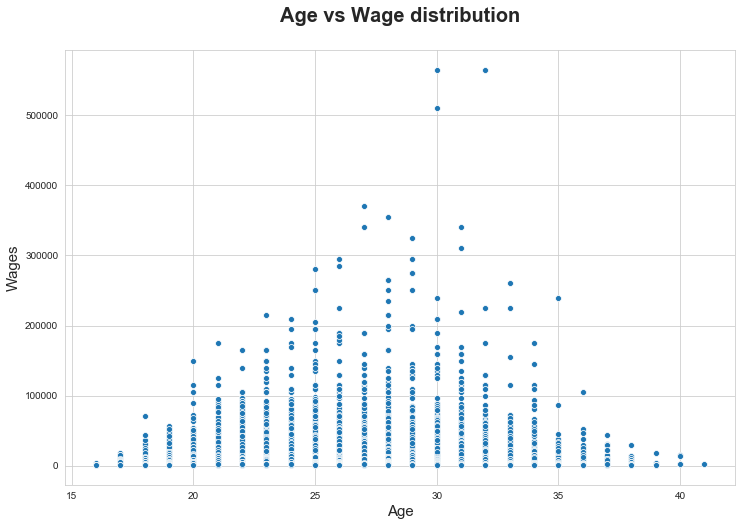

In [609]:
# Distribution of Wages
plt.figure(figsize = (12,8))
sns.set_style('whitegrid')
plt.title('Age vs Wage distribution', fontsize = 20, fontweight = 'bold', y = 1.05,)
sns.scatterplot(x = 'Age', y = 'Wage', data = fifa18, palette = 'hls');
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Wages', fontsize = 15)
plt.show();

The ralation between wages and overall distribution is on the expected lines of higher the rating, higher is the salary drawn.

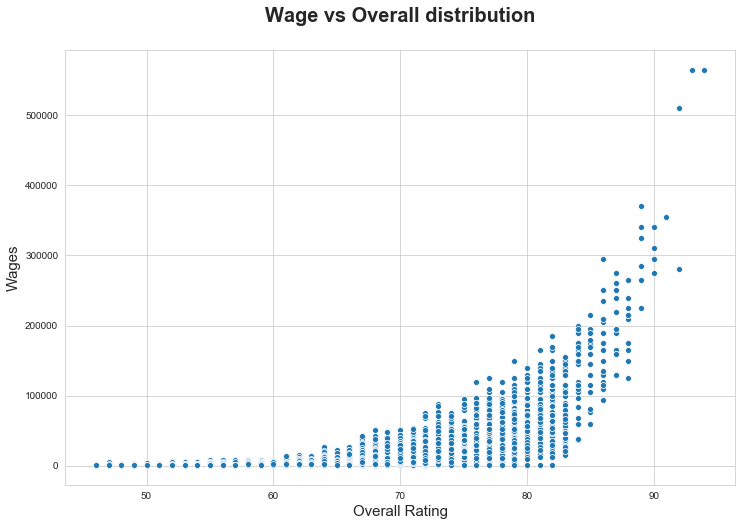

In [610]:
# Distribution of Wages
plt.figure(figsize = (12,8))
sns.set_style('whitegrid')
plt.title('Wage vs Overall distribution', fontsize = 20, fontweight = 'bold', y = 1.05,)
sns.scatterplot(x = 'Overall', y = 'Wage', data = fifa18, palette = 'hls');
plt.xlabel('Overall Rating', fontsize = 15)
plt.ylabel('Wages', fontsize = 15)
plt.show();

## Club wage analysis

Let's see which teams spend the most on player salaries.

The top 10 teams by total wages are displayed below and it is not a surprise that the biggest clubs in the world turn up here. The 2 Spanish clubs FC Barcelona and Real Madrid CF take up top spots. Apart from them, there are 6 English, 1 German and 1 Italian club in the list.

In [714]:
# Teams spending most on player wages
club_wage = fifa18.groupby('Club').agg({'Wage' : ['sum', 'mean', 'min', 'max', 'std', 'count']}).reset_index()
club_wage.columns = ['Club', 'Total Wage', 'Average Wage', 'Minimum Wage', 'Maximum Wage', 'Std Dev', 'Player Count']
club_wage = club_wage.round({'Total Wage' : 0, 'Average Wage' : 0, 'Std Dev' : 2})
club_wage_tw = club_wage.sort_values(by = ['Total Wage'], ascending = False).reset_index().drop(['index'], axis = 1).head(10)
club_wage_tw

Club  Total Wage  Average Wage  Minimum Wage  Maximum Wage  \
0       FC Barcelona   4465000.0      202955.0      120000.0      565000.0   
1     Real Madrid CF   4456000.0      193739.0       22000.0      565000.0   
2   FC Bayern Munich   2969000.0      129087.0        7000.0      355000.0   
3    Manchester City   2950000.0       98333.0        5000.0      325000.0   
4           Juventus   2931000.0      127435.0       37000.0      275000.0   
5            Arsenal   2824000.0       91097.0        6000.0      265000.0   
6  Manchester United   2821000.0      112840.0       10000.0      240000.0   
7            Chelsea   2766000.0      125727.0        4000.0      295000.0   
8            Everton   2320000.0       77333.0        6000.0      130000.0   
9          Liverpool   2076000.0       90261.0       11000.0      205000.0   

     Std Dev  Player Count  
0  118448.89            22  
1  132784.59            23  
2   93907.07            23  
3   85771.68            30  
4   58542.78            23  
5   70181.36            31  
6   66385.04            25  
7   82604.15            22  
8   41359.93            30  
9   54631.17            23

The above list is now sorted on the basis of average salaries of players. This list is almost the same as above with the expception of Paris Saint-German making an appearance at the cost of Everton.

In [716]:
# Teams ranked on basis of highest average wages
club_wage_aw = club_wage.sort_values(by = ['Average Wage'], ascending = False).reset_index().drop(['index'], axis = 1).head(10)
club_wage_aw[['Club', 'Average Wage', 'Total Wage', 'Minimum Wage', 'Maximum Wage', 'Std Dev', 'Player Count']]

Club  Average Wage  Total Wage  Minimum Wage  Maximum Wage  \
0         FC Barcelona      202955.0   4465000.0      120000.0      565000.0   
1       Real Madrid CF      193739.0   4456000.0       22000.0      565000.0   
2     FC Bayern Munich      129087.0   2969000.0        7000.0      355000.0   
3             Juventus      127435.0   2931000.0       37000.0      275000.0   
4              Chelsea      125727.0   2766000.0        4000.0      295000.0   
5    Manchester United      112840.0   2821000.0       10000.0      240000.0   
6      Manchester City       98333.0   2950000.0        5000.0      325000.0   
7              Arsenal       91097.0   2824000.0        6000.0      265000.0   
8            Liverpool       90261.0   2076000.0       11000.0      205000.0   
9  Paris Saint-Germain       82680.0   2067000.0        6000.0      280000.0   

     Std Dev  Player Count  
0  118448.89            22  
1  132784.59            23  
2   93907.07            23  
3   58542.78            23  
4   82604.15            22  
5   66385.04            25  
6   85771.68            30  
7   70181.36            31  
8   54631.17            23  
9   63411.83            25

By playing position, the average salaries are sorted and it is no surprise that most salries are drawn by attacking players followed by midfielder and defenders.

In [613]:
# Wage distribution by position
club_wage_pp = fifa18.groupby(['Playing Position']).agg({'Wage' : ['mean', 'sum', 'min', 'max', 'count']}).reset_index()
club_wage_pp.columns = ['Playing Position', 'Average_Wage', 'Total_Wage', 'Minimum Wage', 'Maximum Wage', 'Player Count']
club_wage_pp = club_wage_pp.round({'Total_Wage' : 0, 'Average_Wage' : 0})
club_wage_pp.sort_values(by = ['Average_Wage'], ascending = False).reset_index().drop(['index'], axis = 1).head(10)

Playing Position  Average_Wage  Total_Wage  Minimum Wage  Maximum Wage  \
0               AT       14033.0  44654000.0        1000.0      565000.0   
1               MF       11943.0  81018000.0        1000.0      340000.0   
2               DF       11062.0  57325000.0        1000.0      310000.0   

   Player Count  
0          3182  
1          6784  
2          5182

The distribution of all the attribute variables are plotted below and it can be observed that most of them follow a normal distribution.

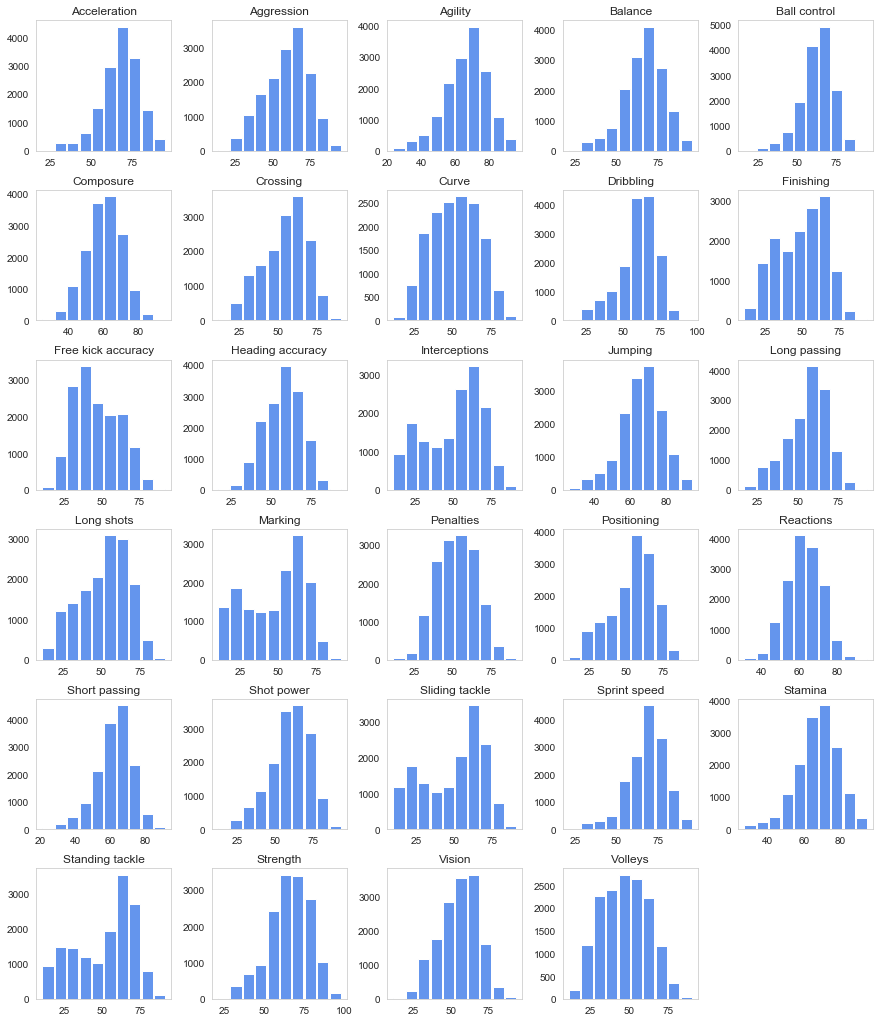

In [614]:
# Distribution of all numeric predictor variables
fifa18[['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
       'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']].hist(grid = False, figsize = (15,18), layout = (6, 5), color = 'cornflowerblue', zorder = 2, rwidth = 0.9);

The correlation matrix is plotted below for attribute variabels and the highest value observed is around 0.6 which is between very few variables.

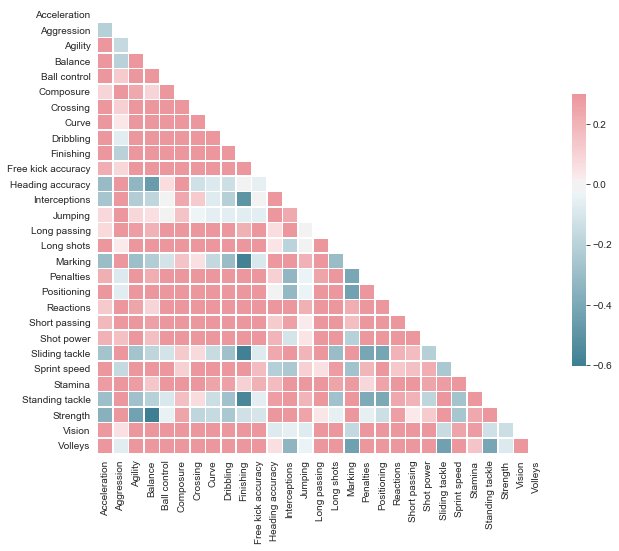

In [615]:
# Correlation matrix for numeric predictors
fifa18_corr = fifa18[['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
                        'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
                        'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
                        'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
                        'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
                        'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(fifa18_corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(fifa18_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# Predictive Modeling

The model will be built with **Wage** as the target/response variable with all variables from attribute table as predictors. The variables from **position** table can't act as predictors since they are all dependent on attribute variables. The data is split into training and testing sets in 70:30 ratio respectively. The model will be built on the training set and evaluated on the testing set.

In [718]:
# Creating predictor and target variables
fifa18_subset = fifa18[['Playing Position', 'Wage', 'Age', 'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
                        'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
                        'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
                        'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
                        'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
                        'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']]

fifa18_pred = pd.get_dummies(fifa18_subset, columns = ['Playing Position'], drop_first=True).drop(['Wage'], axis = 1)
fifa18_target = fifa18_subset[['Wage']]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fifa18_pred, fifa18_target, test_size = 0.3, random_state = 8908)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10603, 32) (10603, 1)
(4545, 32) (4545, 1)


## Linear Regression

### All predictor variables

We'll start with linear regression model with all the variables from predictor tables. However, the model built has an extremely high mean sqaured error **(MSE)** with a very low **r squared** value. The r squared value marks how much of the target variable is explained by predictors (in this case only 32%).

In [719]:
# Linear Regression - all predictor variables

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

wage_lr_all = LinearRegression(fit_intercept = True)
wage_lr_all = wage_lr_all.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_lr_all = wage_lr_all.predict(X_test)

# The coefficients
# print('Coefficients: \n', wage_lr_all.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred_lr_all))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred_lr_all))

Mean squared error: 418756793.28
Coefficient of determination: 0.32


### Variable selection through RFE

We'll perform recursive feature elimination (RFE) to remove certain variables and try to improve our model. However, the improvement is not quite significant with 29 variables and still has a very low accuracy of 39.68%.

In [618]:
from sklearn.feature_selection import RFE
#no of features
nof_list=np.arange(1,30)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 29
Score with 29 features: 0.396846


## Decision Tree

Instead of variable selection, we'll build a regression tree (since the response is a continuous variable). The accuracy with train data is almost perfect which marks the presence of high bias and therefore a very low accuracy with test data.

In [636]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

wage_rt = DecisionTreeRegressor()
wage_tree = wage_rt.fit(X_train, y_train)
wage_tree

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [725]:
print('R squared value with train data', round(wage_tree.score(X_train, y_train), 2))
print('R squared value with test data', round(wage_tree.score(X_test, y_test), 2))

R squared value with train data 1.0
R squared value with test data 0.45


## Random Forest

As an extension of decision tree, we built a random forest model below. Of all the models built, this provides the best result in predicting the wage variable with a low MSE value than above models with most accuracy.

In [638]:
from sklearn.ensemble import RandomForestRegressor

wage_rf = RandomForestRegressor(random_state = 1000)

# Train the model using the training sets
wage_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1000,
                      verbose=0, warm_start=False)

In [639]:
# Make predictions using the testing set
wage_rf_pred = wage_rf.predict(X_test);

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, wage_rf_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, wage_rf_pred))

Mean squared error: 193214051.44
Coefficient of determination: 0.69


The feature importance in the model is calculated and displaye below and it seems that **Reactions**, **Ball Control** and **Finishing** are the most important factors in deciding player wages. In the nect step, let's take a granular look and build the model by playing position and find most important features.

In [641]:
# Get numerical feature importances
importance = list(wage_rf.feature_importances_)
# List of tuples with variable and importance
feature_importance_data = [(feature, importance) for feature, importance in zip(list(X_train.columns), importance)]
# Sort the feature importances by most important first
feature_importance_data = sorted(feature_importance_data, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance_data];

Variable: Reactions            Importance: 0.4884334165748541
Variable: Ball control         Importance: 0.09751712137959587
Variable: Finishing            Importance: 0.06094041239257547
Variable: Standing tackle      Importance: 0.042122817676251416
Variable: Sliding tackle       Importance: 0.03392313453181015
Variable: Long shots           Importance: 0.018386897017754675
Variable: Marking              Importance: 0.01676543422595265
Variable: Positioning          Importance: 0.01671314227107603
Variable: Short passing        Importance: 0.016534247592376268
Variable: Interceptions        Importance: 0.016127324795228735
Variable: Free kick accuracy   Importance: 0.013700472647647682
Variable: Heading accuracy     Importance: 0.012932562348019597
Variable: Jumping              Importance: 0.012565267810792948
Variable: Long passing         Importance: 0.011389563292201987
Variable: Dribbling            Importance: 0.01104501938101302
Variable: Aggression           Importance: 0.010

### Random Forest - Defenders

The key attributes for defenders are **Standing Tackle** and **Sliding Tackle**. Since, defenders face situations where tackling remains the only option in winning the ball from opposition, these 2 attributes are well deserved to take the top spots.

In [635]:
# Defender wage analysis

fifa18_df = fifa18_subset.loc[fifa18_subset['Playing Position'] == 'DF'].reset_index()

fifa18_df_pred = fifa18_df.drop(['Playing Position', 'Wage', 'index'], axis = 1)
fifa18_df_target = fifa18_df[['Wage']]

# Splitting data into training and testing sets
X_df_train, X_df_test, y_df_train, y_df_test = train_test_split(fifa18_df_pred, fifa18_df_target, test_size = 0.3, random_state = 8908)

print(X_df_train.shape, y_df_train.shape)
print(X_df_test.shape, y_df_test.shape)

(3627, 30) (3627, 1)
(1555, 30) (1555, 1)


In [687]:
# Random Forest model for DF
wage_rf_df = RandomForestRegressor(random_state = 1000)

# Train the model using the training sets
wage_rf_df.fit(X_df_train, y_df_train)

# Make predictions using the testing set
wage_rf_df_pred = wage_rf_df.predict(X_df_test);

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_df_test, wage_rf_df_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_df_test, wage_rf_df_pred))

# Get numerical feature importances
importance_df = list(wage_rf_df.feature_importances_)
# List of tuples with variable and importance
feature_importance_df_data = [(feature, importance_df) for feature, importance_df in zip(list(X_df_train.columns), importance_df)]
# Sort the feature importances by most important first
feature_importance_df_data = sorted(feature_importance_df_data, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance_df_data];

Mean squared error: 118966251.48
Coefficient of determination: 0.71
Variable: Standing tackle      Importance: 0.4168717998733599
Variable: Sliding tackle       Importance: 0.14737623780121728
Variable: Reactions            Importance: 0.04518640598607339
Variable: Composure            Importance: 0.040702681222811454
Variable: Short passing        Importance: 0.031970941482187126
Variable: Dribbling            Importance: 0.030467953082833836
Variable: Ball control         Importance: 0.02557875453967753
Variable: Interceptions        Importance: 0.02017212962352499
Variable: Jumping              Importance: 0.019404718407299338
Variable: Aggression           Importance: 0.015391059681139806
Variable: Curve                Importance: 0.015374869088895808
Variable: Agility              Importance: 0.013876508858930194
Variable: Heading accuracy     Importance: 0.013014188196803061
Variable: Marking              Importance: 0.01267433100392034
Variable: Free kick accuracy   Importance: 

#### 1 Tree visualization for DF model

Since, the visualization of the main model will have many nodes, a smaller model will a maximum depth of 3 is built for visualization. The below tree is one of the tree from the model.

The most important variable is deemed to be **Standing tackle**. If it is less than equal to 83.5, then we move left otherwise right. Assume, we move left and the next criteria is decided by **Sliding tackle**. Like above node, if this is less than equal to 73.5, we move left else right. Again, if we move left and face the **Dribbling** criteria of 73.5. If we move left, we end up with a final weekly wage of 5,471.3 Euros and on the other side we get a weekly wage of 35,038.5 Euros.

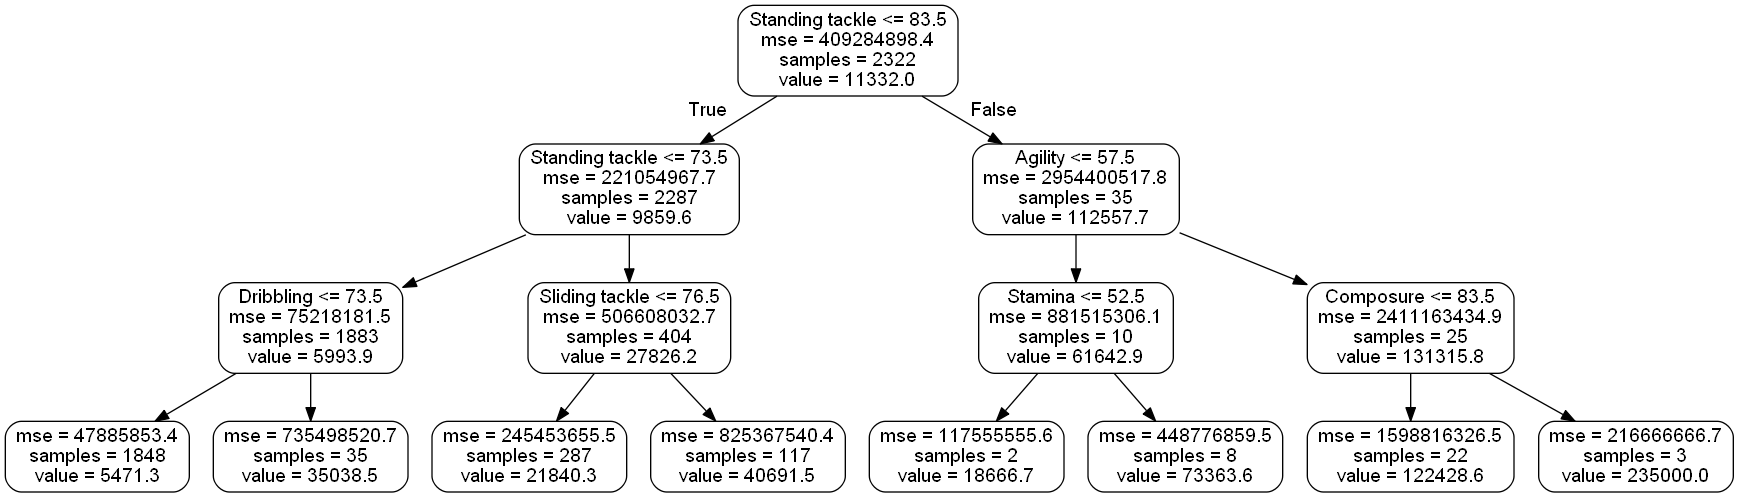

In [695]:
# Random Forest model for DF - Small tree for visualization
wage_rf_df_s = RandomForestRegressor(random_state = 1000, max_depth = 3)

# Train the model using the training sets
wage_rf_df_s.fit(X_df_train, y_df_train)

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree_df = wage_rf_df_s.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree_df = wage_rf_df_s.estimators_[5]
# Export the image to a dot file
export_graphviz(tree_df, out_file = 'tree_df.dot', feature_names = list(X_df_train.columns), rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree_df.dot')
# Write graph to a png file
graph.write_png('tree_df.png')

Image(filename = 'C:/Users/sthal/FIFA images/tree_df.png', width=1000, height=1000)

In [664]:
# Midfielder wage analysis

fifa18_mf = fifa18_subset.loc[fifa18_subset['Playing Position'] == 'MF'].reset_index()

fifa18_mf_pred = fifa18_mf.drop(['Playing Position', 'Wage', 'index'], axis = 1)
fifa18_mf_target = fifa18_mf[['Wage']]

# Splitting data into training and testing sets
X_mf_train, X_mf_test, y_mf_train, y_mf_test = train_test_split(fifa18_mf_pred, fifa18_mf_target, test_size = 0.3, random_state = 7999)

print(X_mf_train.shape, y_mf_train.shape)
print(X_mf_test.shape, y_mf_test.shape)

(4748, 30) (4748, 1)
(2036, 30) (2036, 1)


### Random Forest - Midfielders

Similar to defenders, the model for midfielders is built and the most important variables turn out to be - **Ball Controll** and **Short Passing**. As MF perform the job of creating opportunities along with defending and attacking in situations, they need to have better control and passing abilities.

In [665]:
# Random Forest model for MF
wage_rf_mf = RandomForestRegressor(random_state = 1000)

# Train the model using the training sets
wage_rf_mf.fit(X_mf_train, y_mf_train)

# Make predictions using the testing set
wage_rf_mf_pred = wage_rf_mf.predict(X_mf_test);

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_mf_test, wage_rf_mf_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_mf_test, wage_rf_mf_pred))

# Get numerical feature importances
importance_mf = list(wage_rf_mf.feature_importances_)
# List of tuples with variable and importance
feature_importance_mf_data = [(feature, importance_mf) for feature, importance_mf in zip(list(X_mf_train.columns), importance_mf)]
# Sort the feature importances by most important first
feature_importance_mf_data = sorted(feature_importance_mf_data, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance_mf_data];

Mean squared error: 168380434.25
Coefficient of determination: 0.67
Variable: Ball control         Importance: 0.34957899698787165
Variable: Short passing        Importance: 0.17848523838666605
Variable: Reactions            Importance: 0.07648854704557953
Variable: Positioning          Importance: 0.04850210498901963
Variable: Vision               Importance: 0.03085354365386022
Variable: Sliding tackle       Importance: 0.028300888219044525
Variable: Interceptions        Importance: 0.02401399199917252
Variable: Dribbling            Importance: 0.019686126029752612
Variable: Standing tackle      Importance: 0.017912831366371576
Variable: Marking              Importance: 0.017203738779781094
Variable: Shot power           Importance: 0.017186294468752916
Variable: Heading accuracy     Importance: 0.013565874295170173
Variable: Jumping              Importance: 0.012538637568646814
Variable: Volleys              Importance: 0.012314567852267429
Variable: Composure            Importance:

#### 1 Tree visualization for MF model

A smaller version of the above tree is built for visualization like model for defenders.

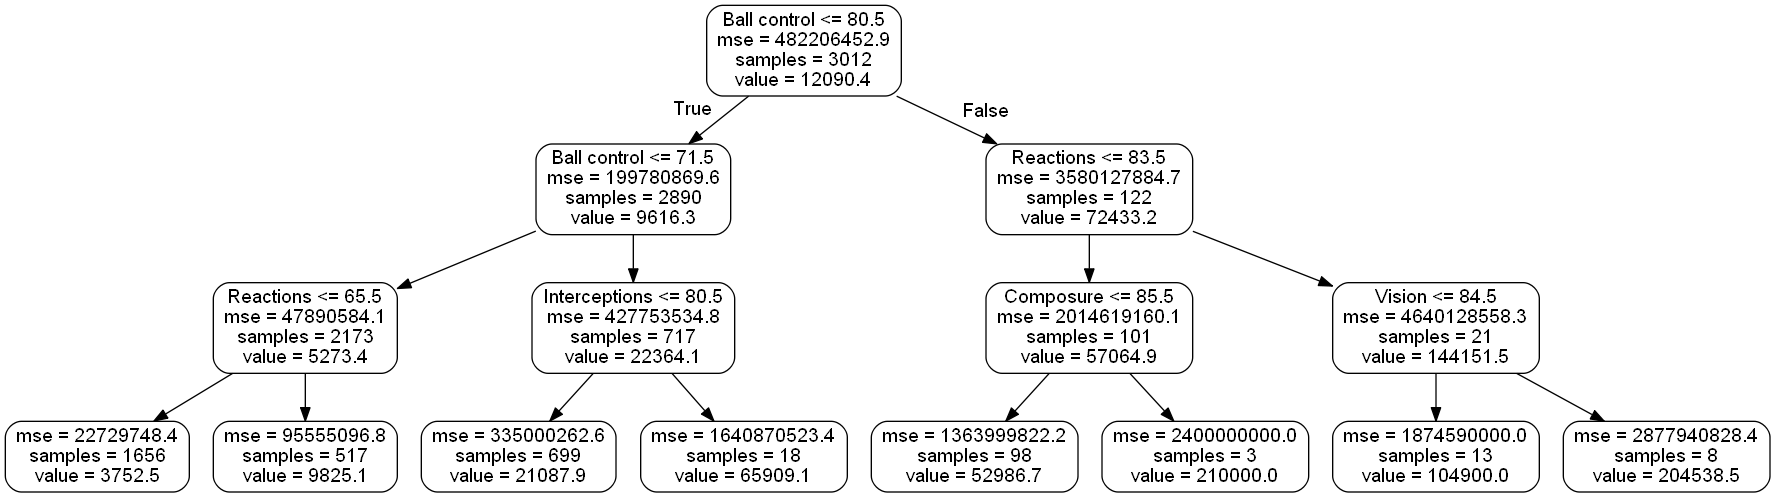

In [697]:
# Random Forest model for MF - Small tree for visualization
wage_rf_mf_s = RandomForestRegressor(random_state = 1000, max_depth = 3)

# Train the model using the training sets
wage_rf_mf_s.fit(X_mf_train, y_mf_train)

# Pull out one tree from the forest
tree_mf = wage_rf_mf_s.estimators_[5]

# Pull out one tree from the forest
tree_mf = wage_rf_mf_s.estimators_[5]
# Export the image to a dot file
export_graphviz(tree_mf, out_file = 'tree_mf.dot', feature_names = list(X_mf_train.columns), rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree_mf.dot')
# Write graph to a png file
graph.write_png('tree_mf.png')

Image(filename = 'C:/Users/sthal/FIFA images/tree_mf.png', width=1000, height=1000)

### Random Forest - Attackers

The attackers model deems **Reactions**, **Positioning** and **Finishing** to be very important factors for attacking players. As the main objective of attacking players is to win the ball in the opposition half and try scoring goals, they must have impeccable reactions and positioning sense to gather the ball. This has to be followed by good finishing skills to score goals.

In [674]:
# Attacker wage analysis

fifa18_at = fifa18_subset.loc[fifa18_subset['Playing Position'] == 'AT'].reset_index()

fifa18_at_pred = fifa18_at.drop(['Playing Position', 'Wage', 'index'], axis = 1)
fifa18_at_target = fifa18_at[['Wage']]

# Splitting data into training and testing sets
X_at_train, X_at_test, y_at_train, y_at_test = train_test_split(fifa18_at_pred, fifa18_at_target, test_size = 0.3, random_state = 9018)

print(X_at_train.shape, y_at_train.shape)
print(X_at_test.shape, y_at_test.shape)

(2227, 30) (2227, 1)
(955, 30) (955, 1)


In [675]:
# Random Forest model for AT
wage_rf_at = RandomForestRegressor(random_state = 1000)

# Train the model using the training sets
wage_rf_at.fit(X_at_train, y_at_train)

# Make predictions using the testing set
wage_rf_at_pred = wage_rf_at.predict(X_at_test);

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_at_test, wage_rf_at_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_at_test, wage_rf_at_pred))

# Get numerical feature importances
importance_at = list(wage_rf_at.feature_importances_)
# List of tuples with variable and importance
feature_importance_at_data = [(feature, importance_at) for feature, importance_at in zip(list(X_at_train.columns), importance_at)]
# Sort the feature importances by most important first
feature_importance_at_data = sorted(feature_importance_at_data, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance_at_data];

Mean squared error: 378791382.85
Coefficient of determination: 0.71
Variable: Reactions            Importance: 0.2595148560898671
Variable: Positioning          Importance: 0.16026863879364636
Variable: Finishing            Importance: 0.15316744708861713
Variable: Ball control         Importance: 0.11048643737120123
Variable: Shot power           Importance: 0.04080588953664394
Variable: Long shots           Importance: 0.03372654052696259
Variable: Vision               Importance: 0.028579772867740397
Variable: Short passing        Importance: 0.02202920282108918
Variable: Free kick accuracy   Importance: 0.021918530352597745
Variable: Dribbling            Importance: 0.017360683968335597
Variable: Acceleration         Importance: 0.014353213393372057
Variable: Sliding tackle       Importance: 0.01344925996367819
Variable: Sprint speed         Importance: 0.011505065634684404
Variable: Curve                Importance: 0.010210482659156405
Variable: Jumping              Importance: 0.

#### 1 Tree visualization for AT model

One of decision tree from the model with a smaller version is built to visualize it below.

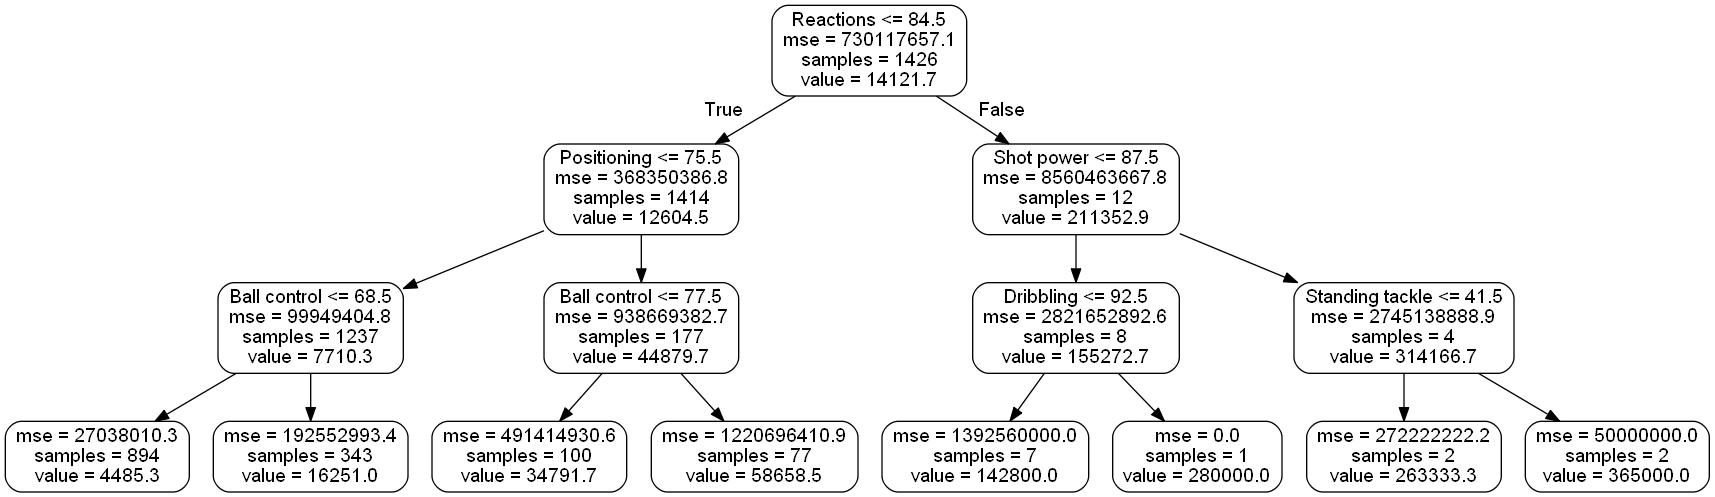

In [699]:
# Random Forest model for AT - Small tree for visualization
wage_rf_at_s = RandomForestRegressor(random_state = 1000, max_depth = 3)

# Train the model using the training sets
wage_rf_at_s.fit(X_at_train, y_at_train)

# Pull out one tree from the forest
tree_at = wage_rf_at_s.estimators_[5]

# Pull out one tree from the forest
tree_at = wage_rf_at_s.estimators_[5]
# Export the image to a dot file
export_graphviz(tree_at, out_file = 'tree_at.dot', feature_names = list(X_at_train.columns), rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree_at.dot')
# Write graph to a png file
graph.write_png('tree_at.png')

Image(filename = 'C:/Users/sthal/FIFA images/tree_at.png', width=1000, height=1000)

In [726]:
# Top 5 features for Wages by position
top_5_features = pd.DataFrame({'Defenders' : ['Standing tackle', 'Sliding tackle', 'Reactions', 'Composure', 'Short passing'],
                              'Midfielders' : ['Ball control', 'Short passing', 'Reactions', 'Positioning', 'Vision'],
                              'Attackers' : ['Reactions', 'Positioning', 'Finishing', 'Ball Control', 'Shot power']})
top_5_features

Defenders    Midfielders     Attackers
0  Standing tackle   Ball control     Reactions
1   Sliding tackle  Short passing   Positioning
2        Reactions      Reactions     Finishing
3        Composure    Positioning  Ball Control
4    Short passing         Vision    Shot power

# Conclusion

The most important factors playing major roles in player wages are listed above. For defenders they are - tackles, reactions, composure and quick passing abilities. On many occasions, they have to do the dirty job of attacking the opposition player to stop them from goal scoring. A wrong move can either lead to suspension which becomes a disadvantage to the team or worse can injure a player seriously. Therefore, clubs are looking for players who are able to maintain a level of equanimity while performing their duties. They need to move seamlessly to avoid fouls and make life easier for their goalkeepers. Players in defending position, along with all other attributes should weigh more focus on the above factors.

The role of a midfielder is very challenging. At times, they need to take a step back and assist their defenders, while they also need to create opportunities for their attacking partners. As evident from the above table, midfielders need to have an impeccable ball control ability. This is followed by proper short passing, reactions to situations, positioning in the field and a clear vision of creativity to score goals. The clubs are willing to lighten their pockets on midfielders with these factors.

During the EDA, it was noted that attacking players draw more salaries than others. They are the most noticed players on the field and therefore need to be exceptional in the game. This is why in the current generation Ronaldo and Messi are drawing the most wages. Attacking players need to be phenomenal in their positioning to receive the ball with excellent reflexes. This has to culminate with seamless finishing to score a goal. Throughout this they should possess flawless ball control to dribble pass the defenders. The attacking players can spend more time building their strength in these areas along with all others during their training.